In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
! kaggle datasets download -d msambare/fer2013

 45% 27.0M/60.3M [00:00<00:00, 140MB/s]
100% 60.3M/60.3M [00:00<00:00, 212MB/s]


In [ ]:
!unzip /content/fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

***Importing Dependencies***

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os

# Importing Deep Learning Libraries
import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential


**Visualize Photos**

In [3]:
path = "/content/"
height = 48
width = 48

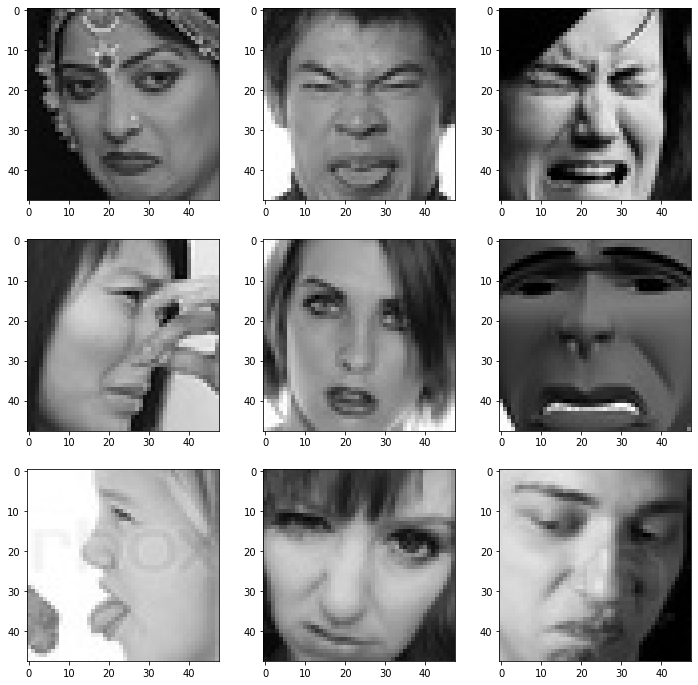

In [7]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(height, width))
    plt.imshow(img)   
plt.show()

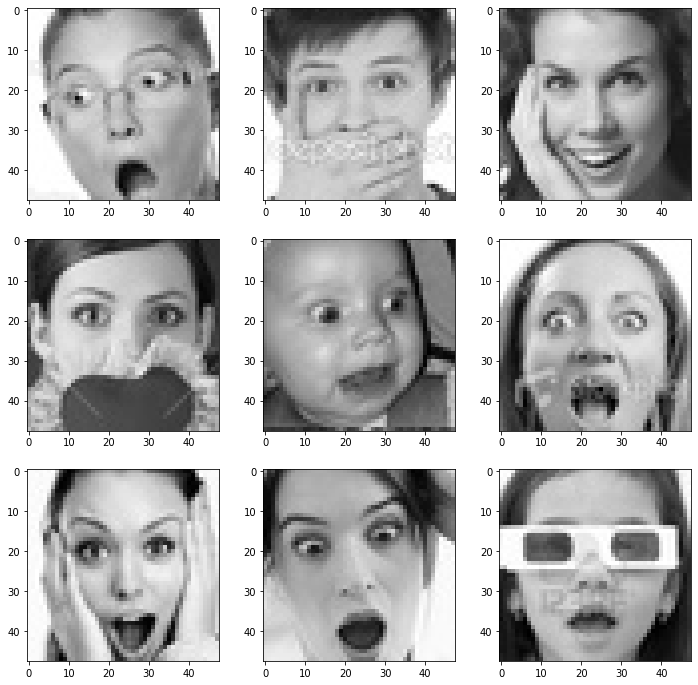

In [8]:
expression = 'surprise'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i], target_size=(height, width))
    plt.imshow(img)   
plt.show()

**Making Training and Validation Data**

In [9]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(path+"train",
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(path+"test",
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Model Building**

In [10]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))



#opt = Adam(lr = 0.0001)
model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [11]:
model.fit(
        train_set,
        epochs=20,
        validation_data=test_set)

Epoch 1/20
225/225 [==============================] - 18s 61ms/step - loss: 1.8200 - accuracy: 0.2664 - val_loss: 1.9546 - val_accuracy: 0.2795
Epoch 2/20
225/225 [==============================] - 12s 53ms/step - loss: 1.5819 - accuracy: 0.3734 - val_loss: 1.6228 - val_accuracy: 0.3773
Epoch 3/20
225/225 [==============================] - 12s 52ms/step - loss: 1.4693 - accuracy: 0.4260 - val_loss: 1.6364 - val_accuracy: 0.3632
Epoch 4/20
225/225 [==============================] - 12s 53ms/step - loss: 1.3919 - accuracy: 0.4589 - val_loss: 1.4670 - val_accuracy: 0.4661
Epoch 5/20
225/225 [==============================] - 12s 53ms/step - loss: 1.3259 - accuracy: 0.4919 - val_loss: 1.4304 - val_accuracy: 0.4519
Epoch 6/20
225/225 [==============================] - 12s 53ms/step - loss: 1.2690 - accuracy: 0.5174 - val_loss: 1.2869 - val_accuracy: 0.5209
Epoch 7/20
225/225 [==============================] - 12s 53ms/step - loss: 1.2194 - accuracy: 0.5373 - val_loss: 1.2084 - val_accuracy:

**Save Model**

In [13]:
model.save("Emotion_Recognition.h5")